First, import all the libraries (from other folders)

In [3]:
#algorithm imports
from Algorithms.Epsilon_Greedy import EpsilonGreedy
from Algorithms.Oracle import Oracle
from Algorithms.UCB1 import UCB1

#arm imports
from Arms.gaussian import GaussianArm
from Arms.brownian import BrownianArm
from Arms.static import NormalArm

#plot imports
from Plots.regret import plot_regret

# from Arms.bernoulli import BernoulliArm
import numpy as np
import random as rand
import matplotlib.pyplot as plt

Next, we want to define the function to run the algorithm. This function takes in a specified algorithm as well as a time horizon.

In [4]:
# horizon is total # of steps
def run_algorithm(algorithm, horizon):
    total_reward = 0
    oracle_total_reward = 0
    cumulative_rewards = [0] * len(arms)
    oracle = Oracle(arms)
    algorithm.reinitialize(n_arms=len(arms))
    # create a matrix of nxm
    # n - # of arms
    # m - # of steps (measures each mean at each step, used for plotting later)
    mean_history = [[] for i in range(len(arms))]
    regret_history = []

    for t in range (horizon):
        #chosen arm is index
        chosen_arm = algorithm.select_arm()
        reward = arms[chosen_arm].draw()
        total_reward += reward

        #oracle action
        oracle_chosen_arm = oracle.select_arm()
        oracle_reward = arms[oracle_chosen_arm].draw()
        oracle_total_reward += oracle_reward
        algorithm.update(chosen_arm, reward)

        #used for plotting regret
        if t == 0:
            regret_history.append(oracle_reward - reward)
        else:
            regret_history.append(oracle_reward - reward + regret_history[t - 1])
        cumulative_rewards[chosen_arm] += reward
    #plot regret vs rounds
    plot_regret(regret_history)
    return cumulative_rewards

Now, we define a list of arms. These are the arms are algorithm will pick from. We also will generate the arms depending on the type (can be changed so that they are not all the same type).

In [5]:
arms = []
#n - num of arms
n = 5

#generate each arm based on Arm Type and n # of arms
expected_vals = [rand.random() for i in range(n)]
for val in expected_vals:
    arms.append(GaussianArm(val))

Something to note is that for certain algorithms, (for example, epsilon greedy), you need to define different paramters. For all algorithms, you need to define the number of arms (n)

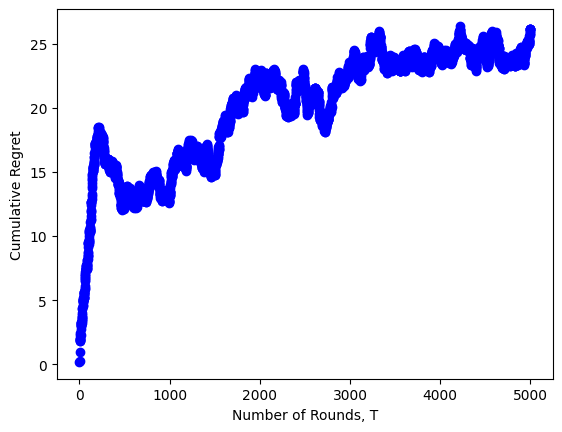

[4456.244543105132,
 12.022780739293852,
 0.9212514748150021,
 0.06581838086832975,
 155.09614590913012]

In [6]:
eps = 0.01
horizon = 5000
#Algorithms
eps_algo = EpsilonGreedy(eps, n_arms = len(arms))
UCB_algo = UCB1(n_arms = len(arms))
run_algorithm(eps_algo, horizon)